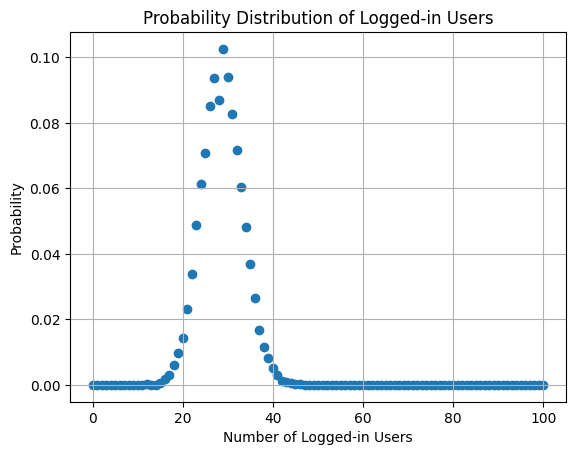

In [5]:
import random as rnd
import matplotlib.pyplot as plt

def decision(probability):
    return rnd.random() < probability

def simulate_convergence(loginProbability, logoutProbability, users, iterations):
    nodeCounter = [0 for x in range(users + 1)]
    userStates = [False for x in range(users)]
    loggedInUsers = 0
    convergence = [[] for _ in range(users + 1)]

    for i in range(iterations):
        for k in range(users):
            if userStates[k]:
                if decision(logoutProbability):
                    userStates[k] = False
                    loggedInUsers -= 1
            else:
                if decision(loginProbability):
                    userStates[k] = True
                    loggedInUsers += 1

        nodeCounter[loggedInUsers] += 1

        if i > 1000:
            for j in range(users + 1):
                convergence[j].append(float(nodeCounter[j]) / (i - 1000))

    return convergence

prob = simulate_convergence(0.2, 0.5, 100, 10**4)

final_probabilities = [p[-1] if p else 0 for p in prob]

plt.scatter(range(101), final_probabilities)
plt.grid(True)
plt.title("Probability Distribution of Logged-in Users")
plt.xlabel("Number of Logged-in Users")
plt.ylabel("Probability")

plt.show()
